In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn import metrics
%matplotlib inline

In [35]:
saldata = pd.read_csv(r'C:\Users\ASUS\Downloads\Salary_Data.csv')

In [36]:
saldata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
saldata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


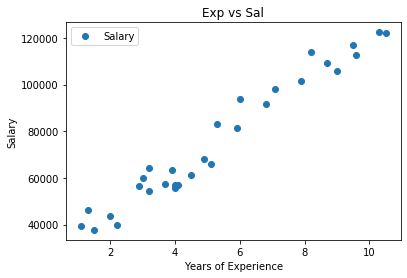

In [38]:
saldata.plot(x='YearsExperience',y='Salary',style='o')
plt.title('Exp vs Sal')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

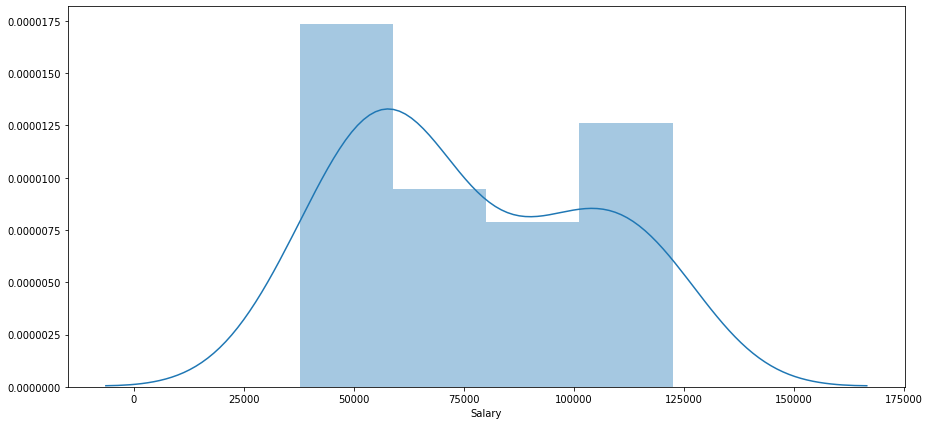

In [39]:
plt.figure(figsize=(15,7))
plt.tight_layout()
seabornInstance.distplot(saldata['Salary'])

In [40]:
X = saldata.iloc[: , :-1].values
Y = saldata.iloc[: , -1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(regressor.intercept_)
print(regressor.coef_)

26780.099150628186
[9312.57512673]


In [44]:
prediction = regressor.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':prediction.flatten()})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


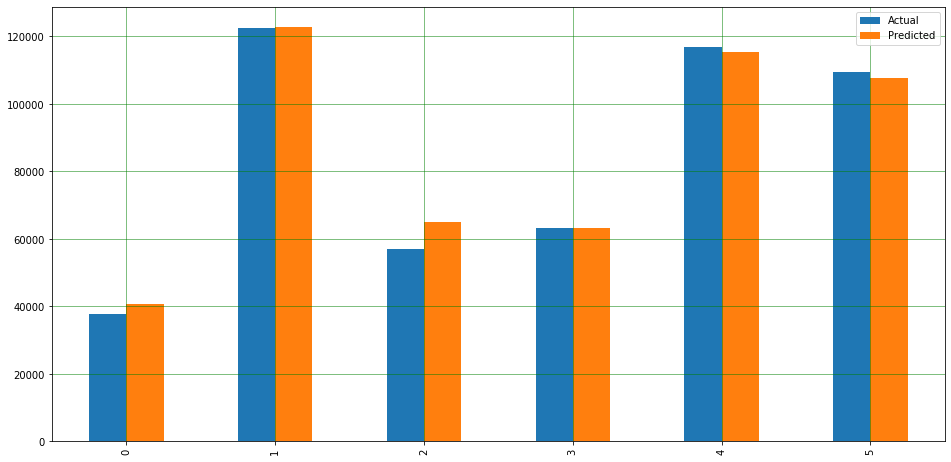

In [46]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

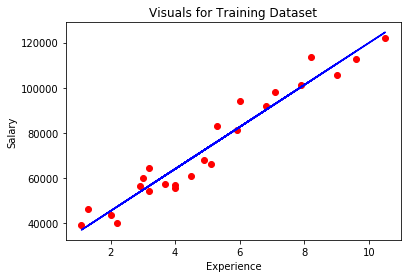

In [47]:
plt.scatter(X_train, Y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

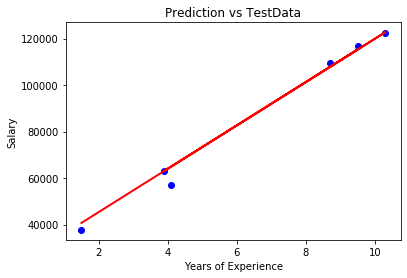

In [48]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Prediction vs TestData')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

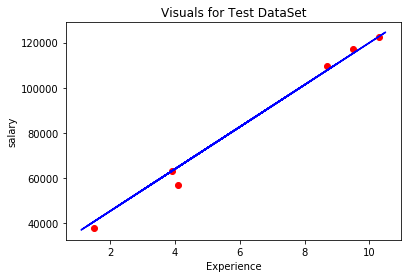

In [49]:
plt.scatter(X_test, Y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Experience")
plt.ylabel("salary")
plt.show()

In [50]:
print(regressor.coef_)

[9312.57512673]


In [51]:
print(regressor.intercept_)

26780.099150628186


In [52]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(Y_test , prediction))
print('Mean Squared Error:' , metrics.mean_squared_error(Y_test , prediction))
print('Root mean Squared Error:',
np.sqrt(metrics.mean_squared_error(Y_test , prediction)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root mean Squared Error: 3580.979237321345
